## Ploting results from feature compression datasets

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### BLAT Ostermeier 2014

In [ ]:
# Once we have all the fasta files and metadata we can extract the embeddings for each fasta.
python scripts/extract.py esm2_t30_150M_UR50D data/sumo1_human_data.fasta embeddings/sumo1_esm2_150M --repr_layers 30 --include bos mean per_tok


# Then we can compress the embeddings with the following command
dir_path = 'embeddings/BLAT_ECOLX_Ostermeier2014_esm2_150M/'
for i in ['mean', 'bos', 'max_pool', 'pca1', 'pca2', 'pca1-2', 'iDCT', 'rbf1', 'sigmoid1']:
    print(f'Compressing embeddings using {i}')
    embed = load_per_tok_embeds(dir_path, i)
    with open(f'embeddings/BLAT_ECOLX_Ostermeier2014_esm2_150M_compressed/BLAT_ECOLX_Ostermeier2014_esm2_150M_{i}.pkl', 'wb') as f:
        pickle.dump(embed, f)


# or one by one, but will take too long
python scripts/compressing_embeddings_v02.py  -e embeddings/sumo1_esm2_150M -c mean -l 30


# or by using the following command, see the script for more details
bash run_compression.sh


# with the compressed embedding we can run the regression model, see script for more details
python scripts/run_reg_Lasso.py -i embeddings/BLAT_ECOLX_Ostermeier2014_esm2_150M_compressed -m data/BLAT_ECOLX_Ostermeier2014_metadata_v02.csv -o results/BLAT_ECOLX_Ostermeier2014_esm2_150M_layer_30_compressed.csv

In [ ]:
# checking corrupted files
path_compressed_embeds = 'embeddings/PABP_YEAST_Fields2013_doubles_esm2_150M_compressed'
for file in os.listdir(path_compressed_embeds):
    if file.endswith('.pkl'):
        method = file.split('_')[-1].split('.')[0]
        print('\nResults for method:', method)
        file_path = os.path.join(path_compressed_embeds, file)
        embed = pd.read_pickle(file_path)
        embed_df = pd.DataFrame.from_dict(embed, orient='index').reset_index()
        embed_df.rename(columns={'index': 'ID'}, inplace=True)

## Results

In [2]:
def plot_results(res_path):
    results = pd.read_csv(res_path, index_col=0)
    results.sort_values('Compression_methd', inplace=True)
    title = ' '.join(res_path.split('/')[-1].split('_')[:-5])
    plt.figure(figsize=(12, 5))
    sns.barplot(data=results, x='Compression_methd', y='R2_score_test')
    plt.title(title)
    plt.ylim(0, 1)
    plt.ylabel('R2 Score')
    plt.xlabel('Compression methd')
    plt.show()

1


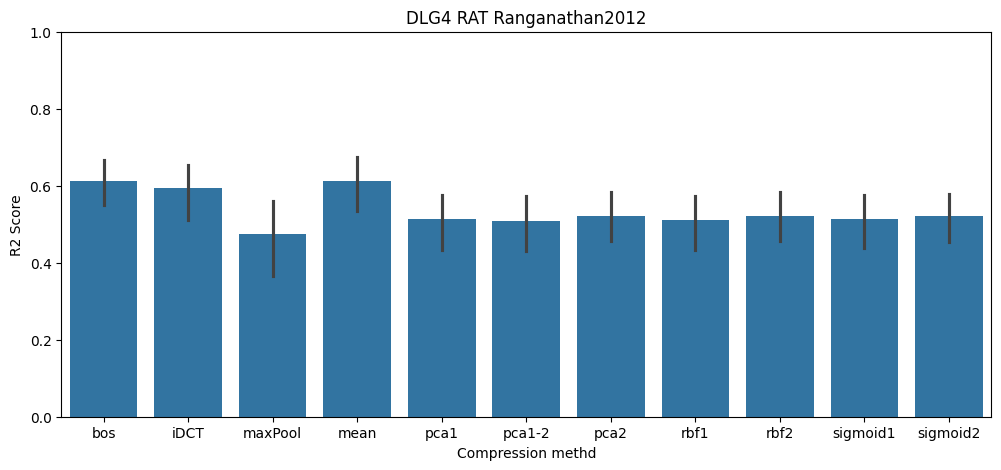

2


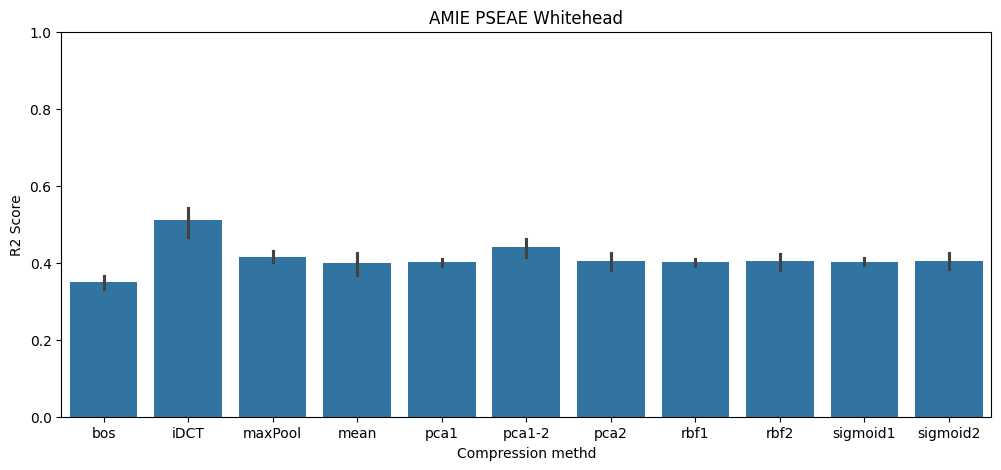

3


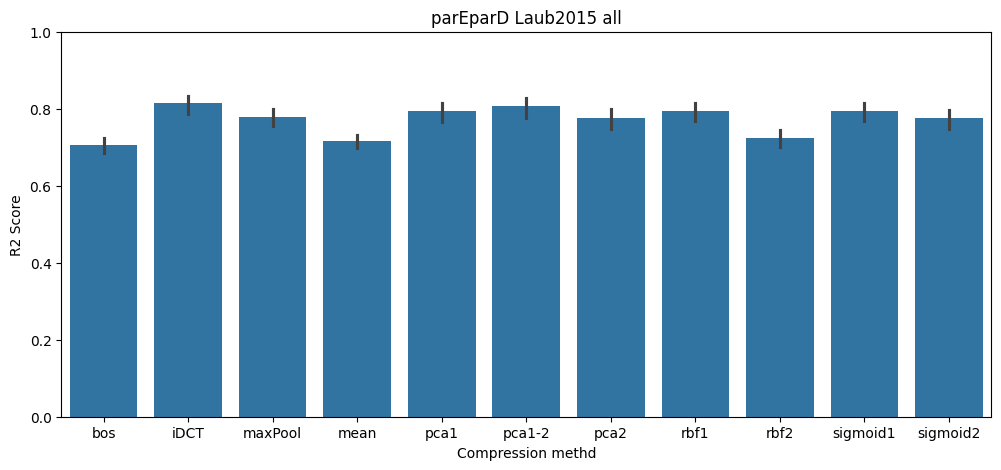

4


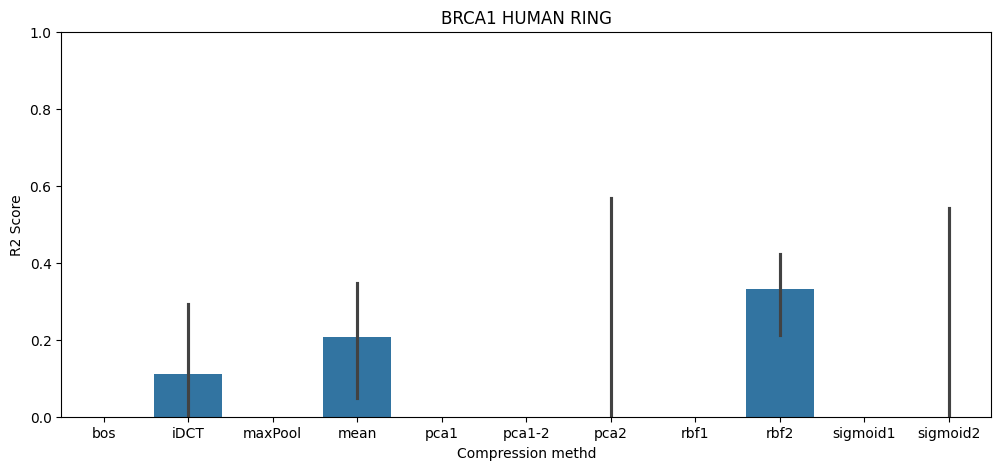

5


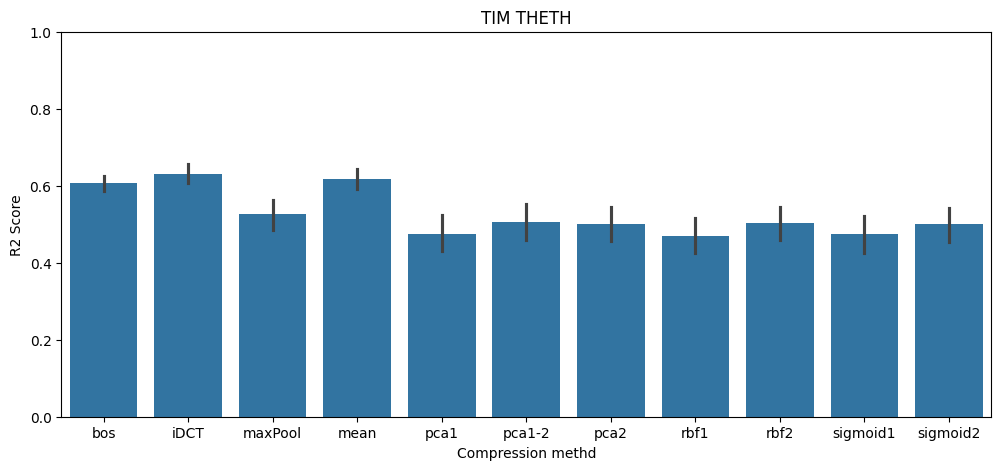

6


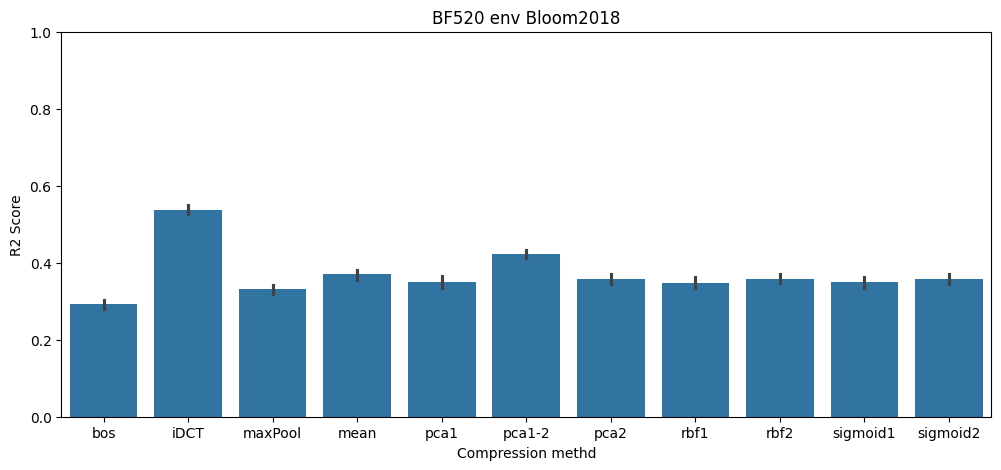

7


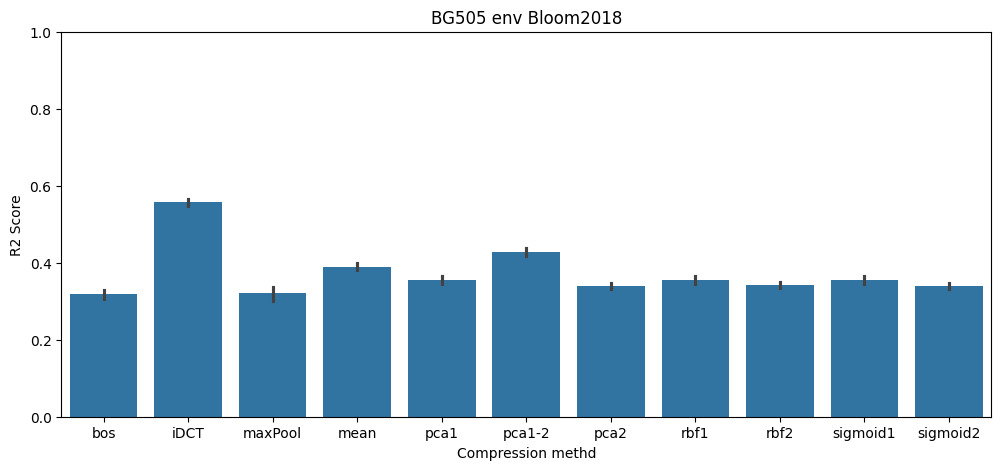

8


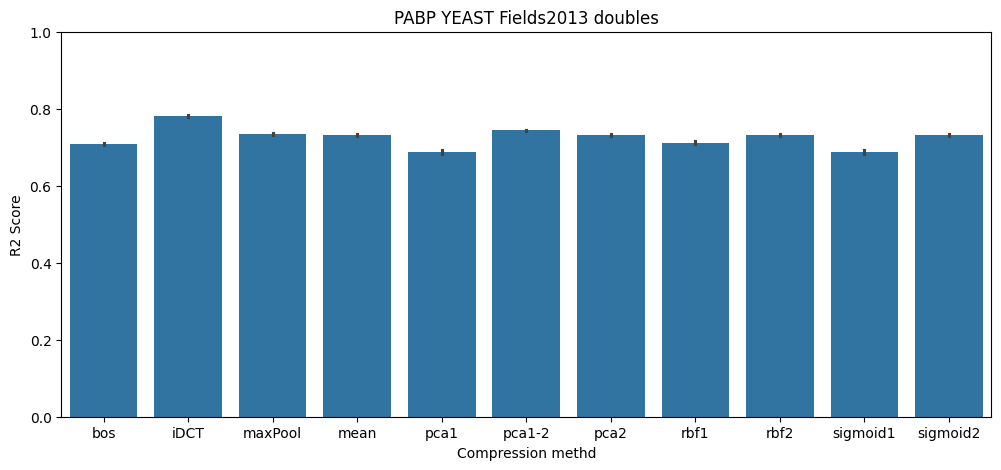

9


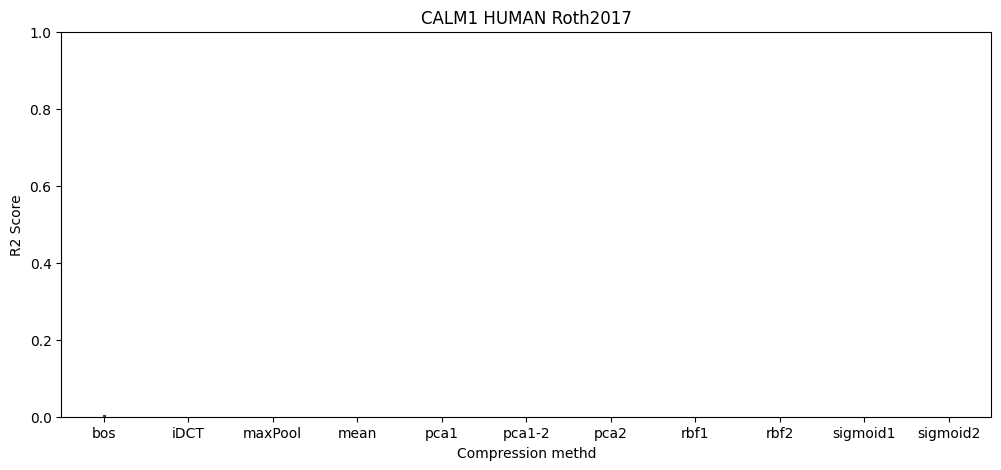

10


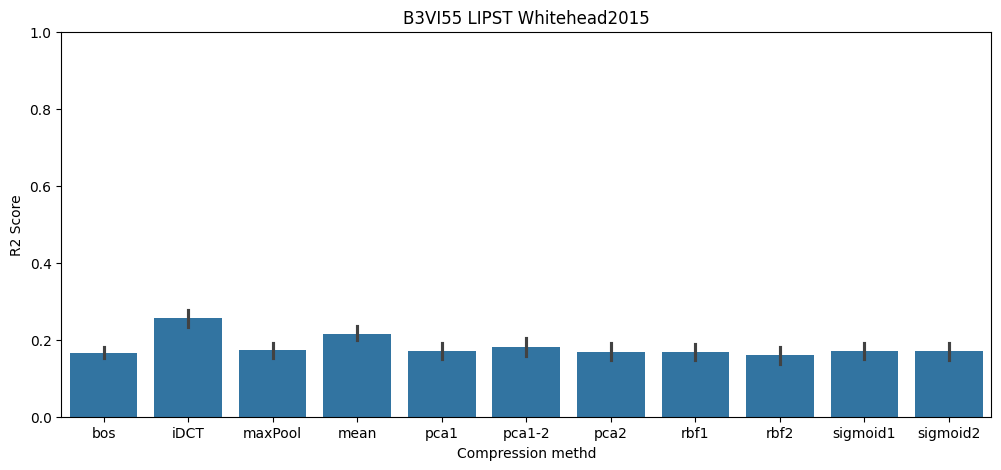

11


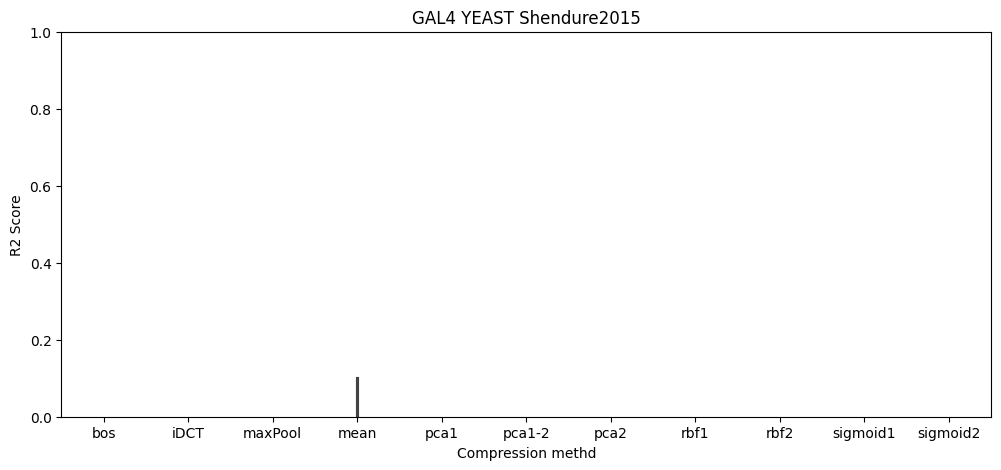

12


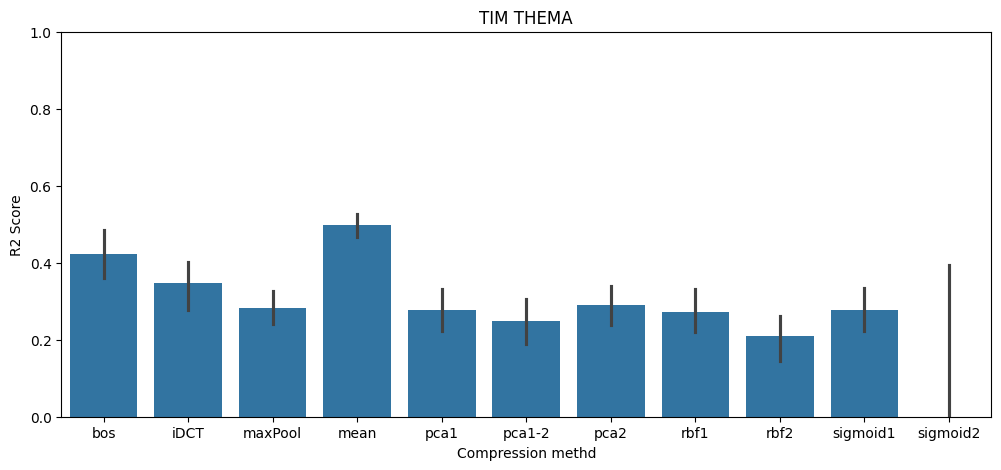

13


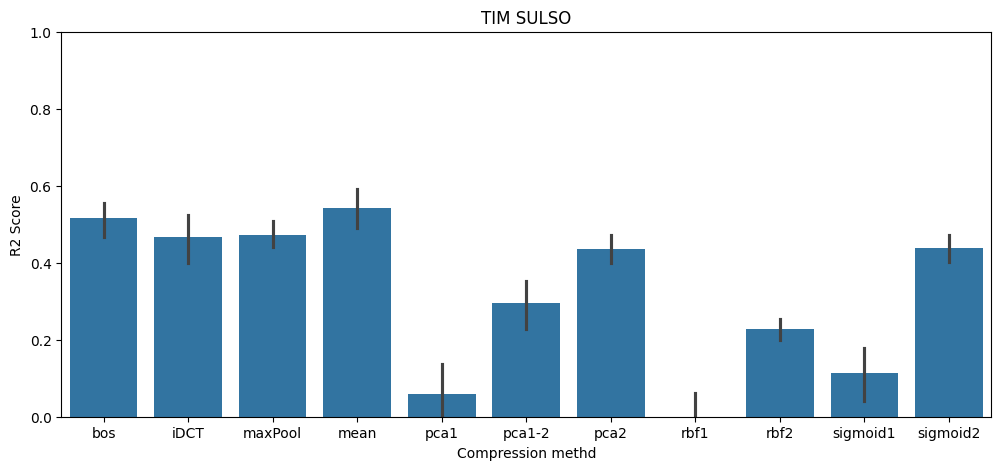

14


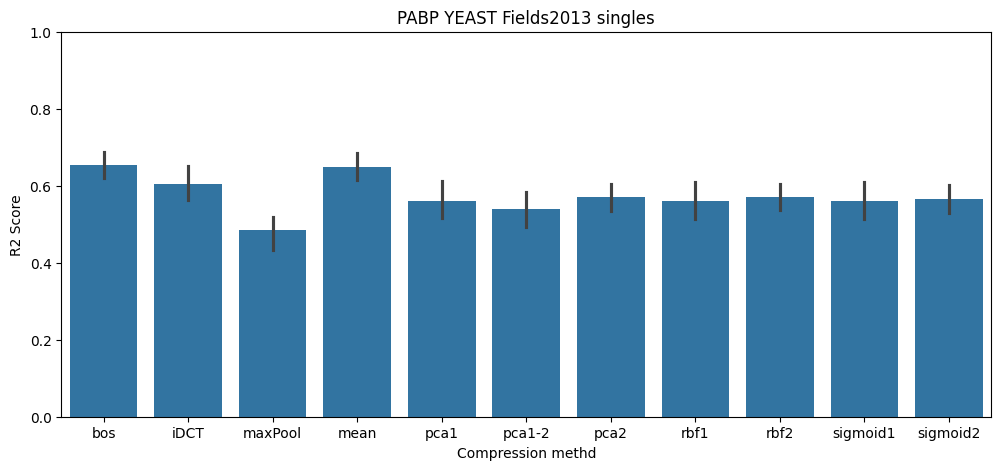

15


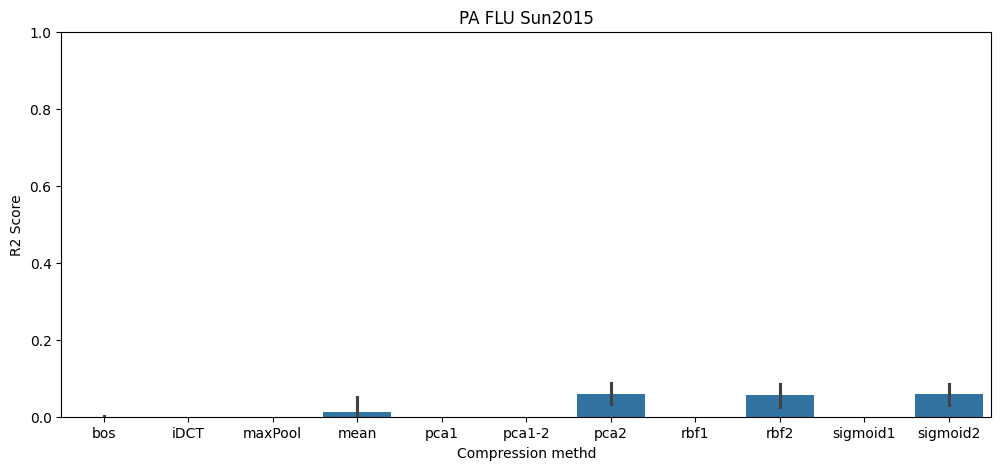

16


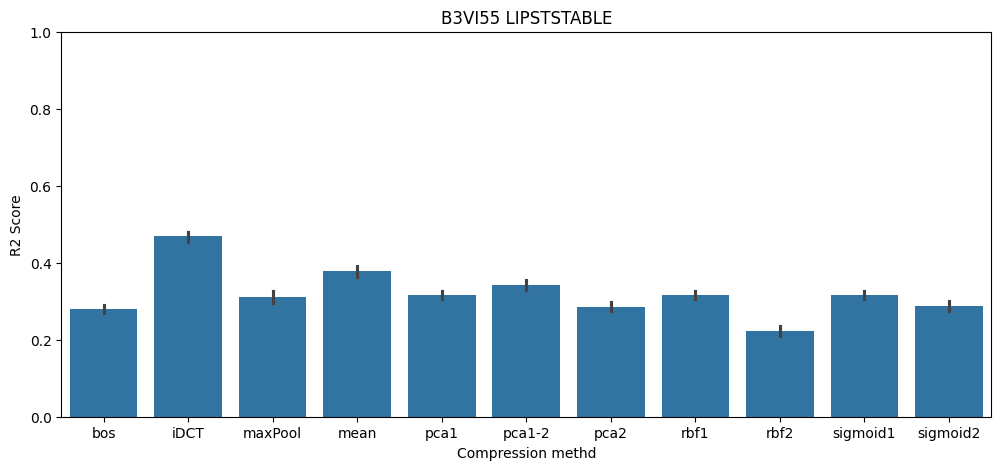

17


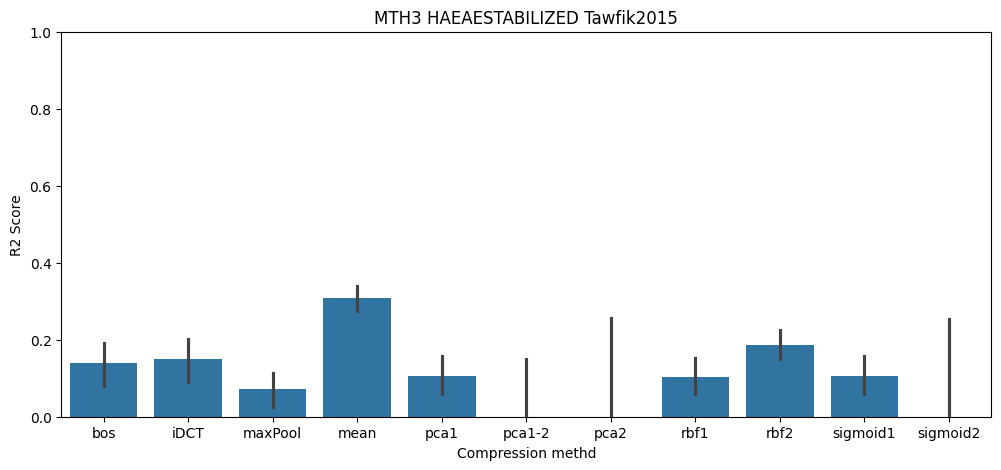

18


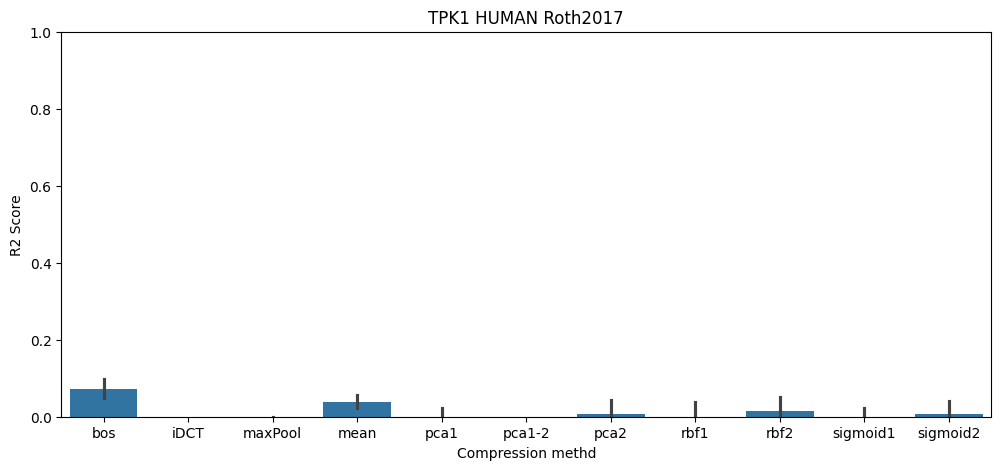

In [4]:
count=0
base_path = 'results/regression_L1_1e-4'
for file in os.listdir(base_path):
    count+=1
    print(count)
    file_path = os.path.join(base_path, file)

    plot_results(file_path)

## Merging files

In [41]:
base_path = 'results/regression_L1_1e-3'
data = pd.DataFrame()
for file in os.listdir(base_path):
    file_path = os.path.join(base_path, file)
    df = pd.read_csv(file_path, index_col=0)
    dataset = [file.split('_esm2')[0]] *len(df)

    df.insert(0, 'Dataset', dataset,)
    data = pd.concat([data, df])

data

,Dataset,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_methd
0,HG_FLU_Bloom2016,Lasso,1,0.211701,0.975046,1.152943,0.185751,1.002670,1.185001,0.509491,0.504677,148,pca2
1,HG_FLU_Bloom2016,Lasso,2,0.208522,0.974549,1.152919,0.198153,1.023944,1.198264,0.506992,0.493246,139,pca2
2,HG_FLU_Bloom2016,Lasso,3,0.209259,0.980166,1.158123,0.208379,0.964127,1.138799,0.509579,0.519696,146,pca2
3,HG_FLU_Bloom2016,Lasso,4,0.213262,0.972196,1.150066,0.160123,1.033975,1.218825,0.511800,0.442876,142,pca2
4,HG_FLU_Bloom2016,Lasso,5,0.212964,0.979703,1.157106,0.173533,0.968335,1.145604,0.512723,0.476926,147,pca2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,IF1_ECOLI,Lasso,6,0.695225,0.108231,0.152622,0.637445,0.135809,0.192915,0.721036,0.678805,143,pca2
6,IF1_ECOLI,Lasso,7,0.708841,0.108533,0.153429,0.554788,0.122021,0.170633,0.722581,0.658299,153,pca2
7,IF1_ECOLI,Lasso,8,0.712216,0.108295,0.150932,0.497629,0.133309,0.201428,0.723878,0.717433,146,pca2
8,IF1_ECOLI,Lasso,9,0.702979,0.109426,0.154270,0.618916,0.121259,0.165629,0.733136,0.589967,155,pca2


In [42]:
#data.to_csv('results/summary_DMS_results_regression_1e-3.csv')

In [44]:
l1 = ['mean', 'pca1', 'iDCT']
data1 = data.query("Compression_methd in @l1").copy()
data1

,Dataset,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_methd
0,HG_FLU_Bloom2016,Lasso,1,0.430489,0.806381,0.979971,0.410857,0.831546,1.007976,0.696362,0.683673,563,iDCT
1,HG_FLU_Bloom2016,Lasso,2,0.436584,0.799253,0.972733,0.363836,0.888981,1.067312,0.699936,0.638704,558,iDCT
2,HG_FLU_Bloom2016,Lasso,3,0.434976,0.806003,0.978974,0.378428,0.821965,1.009100,0.699932,0.651708,564,iDCT
3,HG_FLU_Bloom2016,Lasso,4,0.434587,0.801002,0.974968,0.354430,0.884876,1.068576,0.699850,0.619834,561,iDCT
4,HG_FLU_Bloom2016,Lasso,5,0.436127,0.805693,0.979414,0.351768,0.837486,1.014582,0.699333,0.630571,551,iDCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,IF1_ECOLI,Lasso,6,0.786787,0.090340,0.127654,0.668791,0.124760,0.184387,0.778261,0.732158,256,iDCT
6,IF1_ECOLI,Lasso,7,0.793111,0.091430,0.129334,0.613513,0.116906,0.158982,0.779538,0.696114,267,iDCT
7,IF1_ECOLI,Lasso,8,0.799720,0.089556,0.125912,0.557597,0.124933,0.189024,0.782143,0.698727,261,iDCT
8,IF1_ECOLI,Lasso,9,0.796697,0.090417,0.127632,0.687524,0.106080,0.149981,0.784124,0.644754,264,iDCT


In [45]:
cols = ['Dataset', 'R2_score_test']
dataset_order = data1[cols].groupby('Dataset').mean().sort_values('R2_score_test', ascending=False).index
data1['Dataset'] = pd.Categorical(data1['Dataset'], categories=dataset_order, ordered=True)
data1.sort_values('Dataset', inplace=True)
data1

,Dataset,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_methd
0,BLAT_ECOLX_Ranganathan2015,Lasso,1,8.157177e-01,0.387053,0.493549,0.754248,0.446240,0.578831,0.894768,0.864913,671,iDCT
0,BLAT_ECOLX_Ranganathan2015,Lasso,1,6.675513e-01,0.534167,0.662903,0.618301,0.584244,0.721380,0.823547,0.787825,381,pca1
9,BLAT_ECOLX_Ranganathan2015,Lasso,10,6.683398e-01,0.531514,0.661767,0.611453,0.593797,0.731064,0.820971,0.804389,379,pca1
1,BLAT_ECOLX_Ranganathan2015,Lasso,2,8.175630e-01,0.386193,0.492170,0.739646,0.454323,0.583815,0.894336,0.850695,668,iDCT
9,BLAT_ECOLX_Ranganathan2015,Lasso,10,6.884936e-01,0.513053,0.641346,0.676560,0.536848,0.667007,0.832542,0.831508,221,mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,UBE4B_MOUSE_Klevit2013_singles,Lasso,6,5.141389e-01,0.606080,0.789418,-0.635467,1.091359,1.363540,0.692651,-0.185587,336,pca1
4,UBE4B_MOUSE_Klevit2013_singles,Lasso,5,5.010604e-01,0.609228,0.788237,-0.262629,1.035199,1.363535,0.692453,0.055093,333,pca1
3,UBE4B_MOUSE_Klevit2013_singles,Lasso,4,5.065354e-01,0.608433,0.789325,-0.413651,1.092685,1.352342,0.693576,-0.052048,334,pca1
5,UBE4B_MOUSE_Klevit2013_singles,Lasso,6,-8.881784e-16,0.859140,1.132533,-0.002510,0.807082,1.067558,NaN,NaN,0,mean


In [43]:
# del_cols1 = [ 'GAL4_YEAST_Shendure2015', 'BRCA1_HUMAN_RING','POLG_HCVJF_Sun2014', 'BRCA1_HUMAN_BRCT','UBE4B_MOUSE_Klevit2013_singles']
# del
# data['Dataset'] = data['Dataset'].astype('object')
# data_plot = data[~data['Dataset'].isin(del_cols1)]
# data_plot

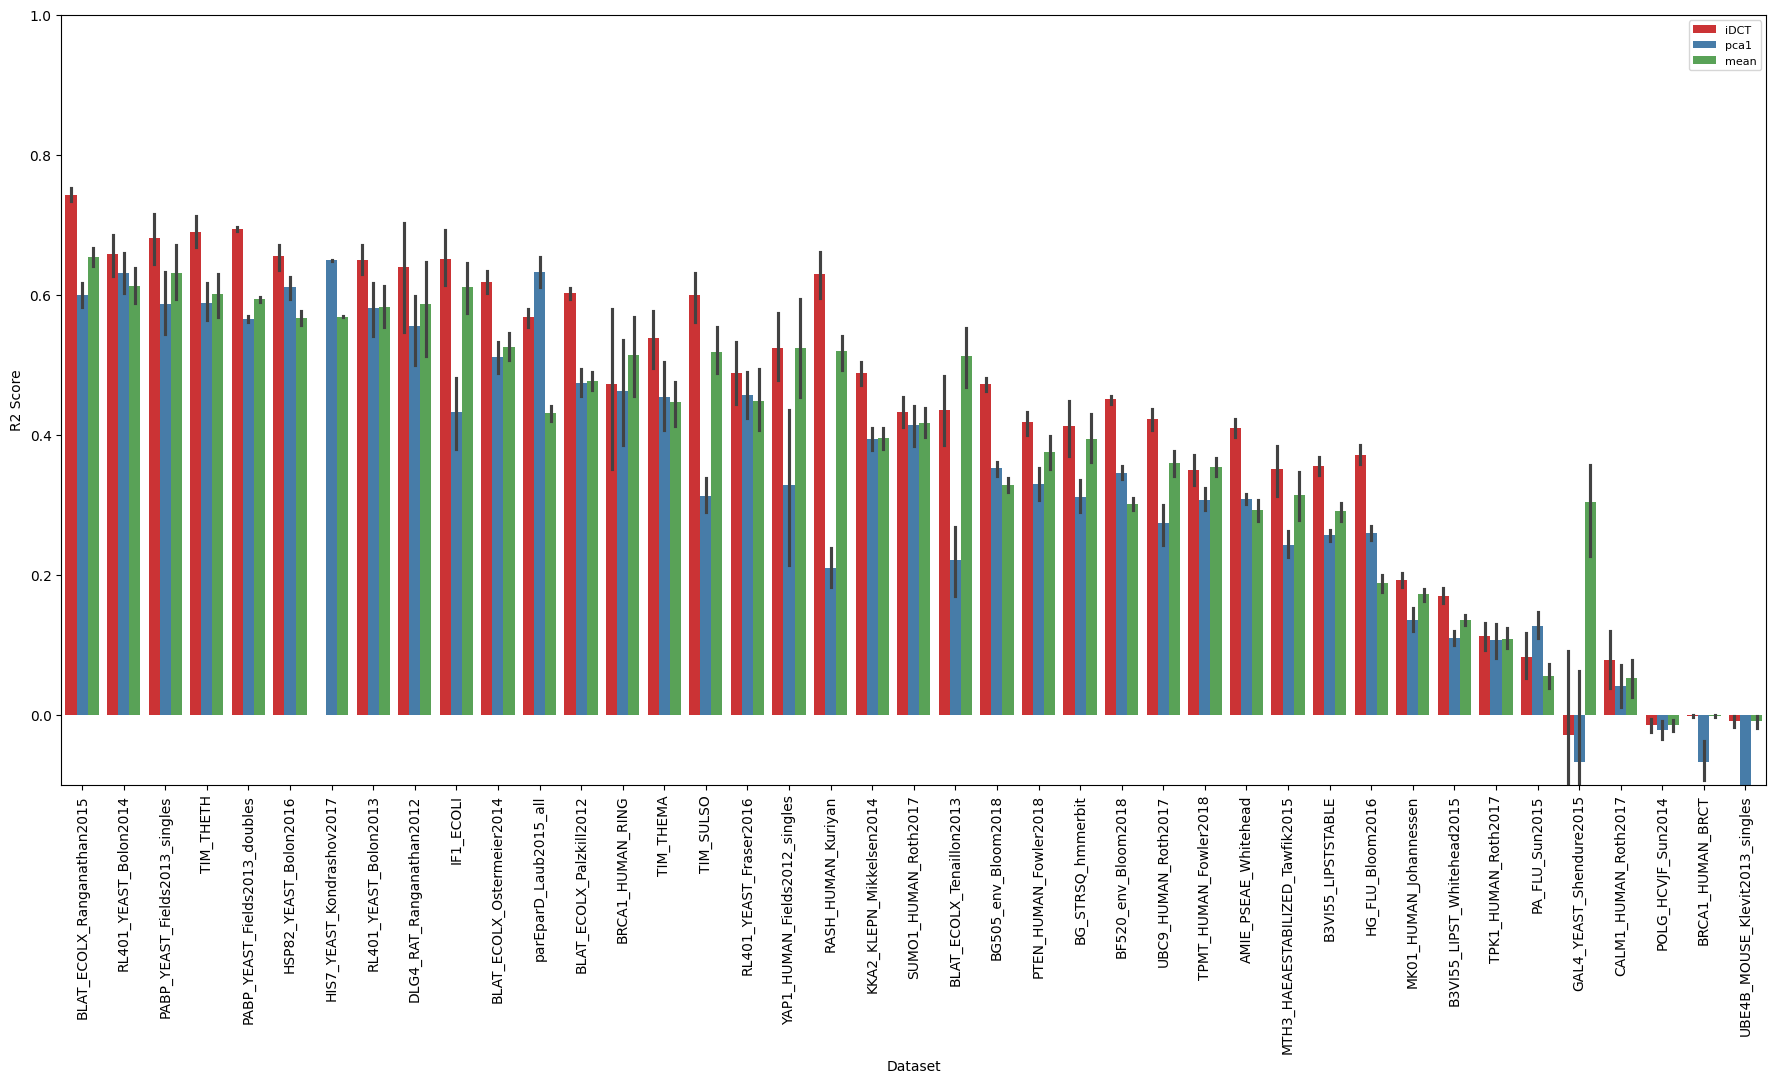

In [46]:
plt.figure(figsize=(22, 10))
sns.barplot(data=data1, x='Dataset', y='R2_score_test', hue='Compression_methd', palette='Set1')
plt.ylim(-0.1, 1)
plt.ylabel('R2 Score')
plt.xlabel('Dataset')
plt.xticks(rotation=90)
plt.legend(loc='upper right', prop={'size': 8})
plt.show()

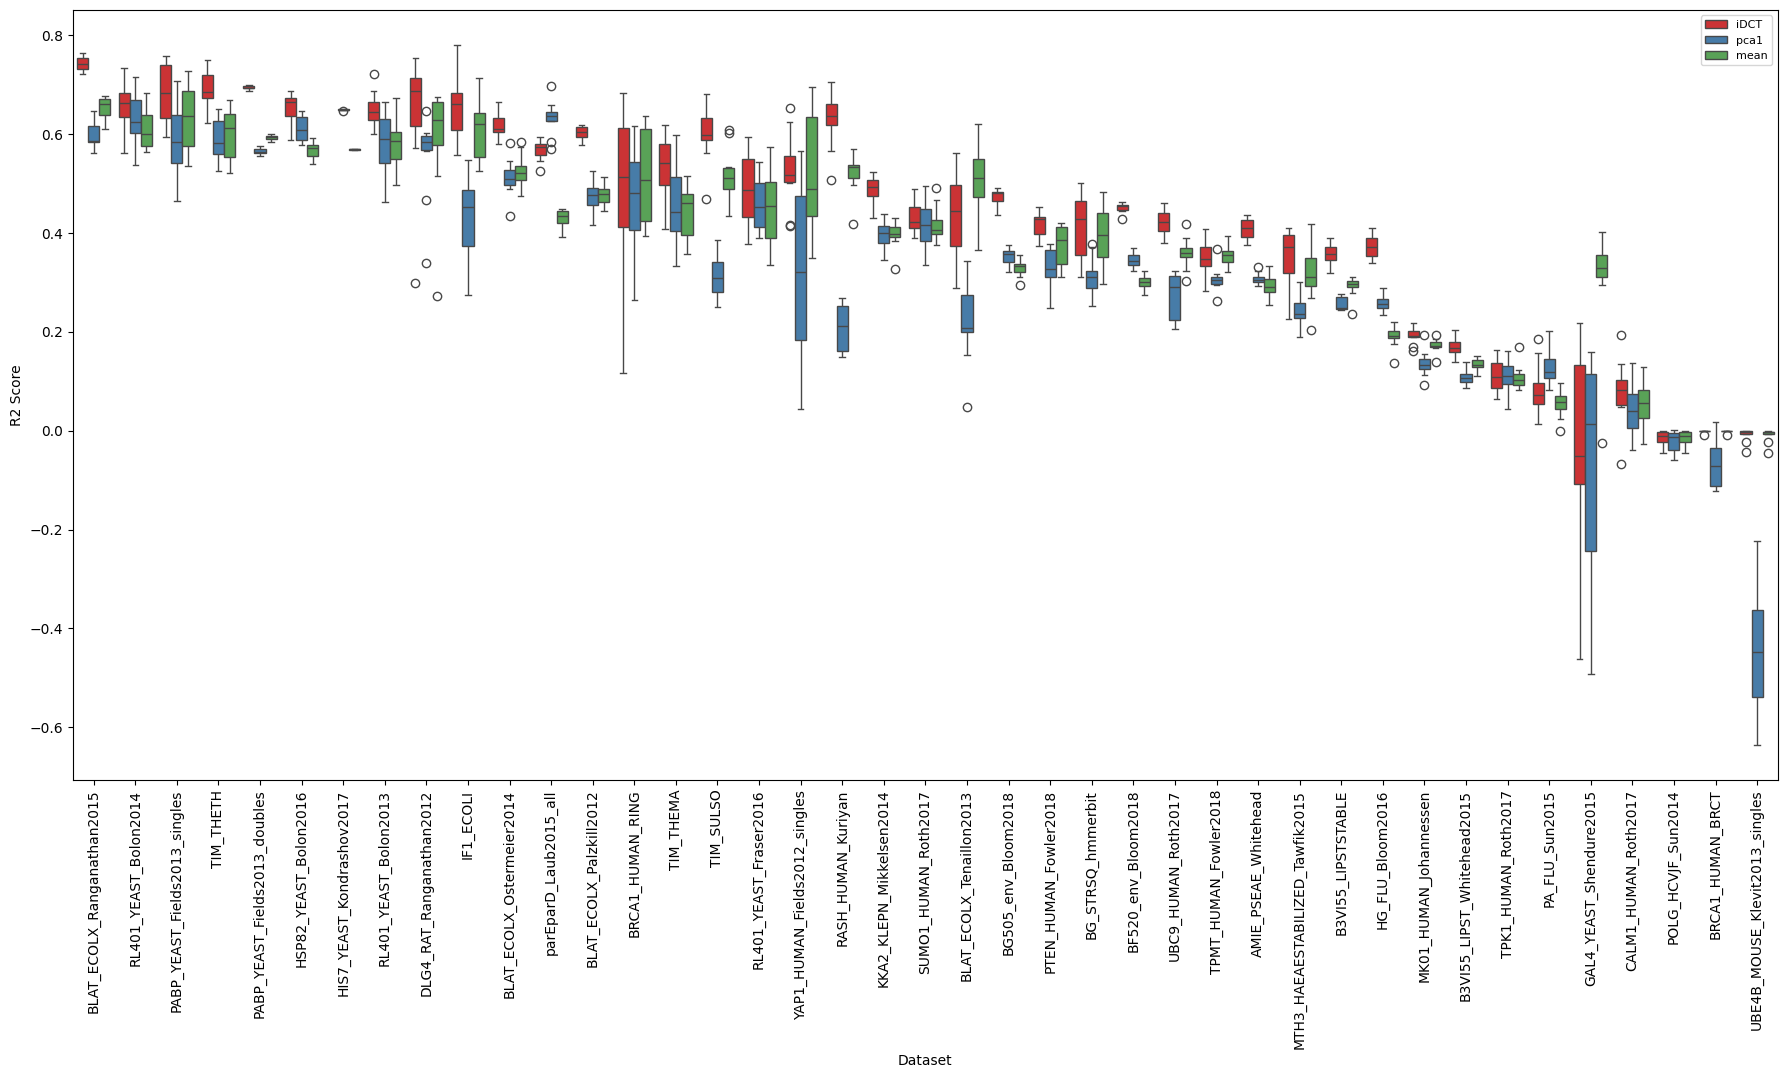

In [49]:
plt.figure(figsize=(22, 10))
sns.boxplot(data=data1, x='Dataset', y='R2_score_test', hue='Compression_methd', palette='Set1')
#plt.ylim(-0.1, 1)
plt.ylabel('R2 Score')
plt.xlabel('Dataset')
plt.xticks(rotation=90)
plt.legend(loc='upper right', prop={'size': 8})
plt.show()